In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
cars_df =pd.read_csv(r"C:\Users\acer\Downloads\kaggle datasets\used_cars_data.csv") #files path has forward slash so using r
print(cars_df.head(5))


   S.No.                              Name    Location  Year  \
0      0            Maruti Wagon R LXI CNG      Mumbai  2010   
1      1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015   
2      2                      Honda Jazz V     Chennai  2011   
3      3                 Maruti Ertiga VDI     Chennai  2012   
4      4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013   

   Kilometers_Driven Fuel_Type Transmission Owner_Type     Mileage   Engine  \
0              72000       CNG       Manual      First  26.6 km/kg   998 CC   
1              41000    Diesel       Manual      First  19.67 kmpl  1582 CC   
2              46000    Petrol       Manual      First   18.2 kmpl  1199 CC   
3              87000    Diesel       Manual      First  20.77 kmpl  1248 CC   
4              40670    Diesel    Automatic     Second   15.2 kmpl  1968 CC   

       Power  Seats  New_Price  Price  
0  58.16 bhp    5.0        NaN   1.75  
1  126.2 bhp    5.0        NaN  12.50  
2   88.7 bhp    5.0 

In [102]:
print(cars_df.shape) #shows no of rows and columns

(7253, 14)


In [103]:
print(cars_df.describe())
     #count: no. of non-null(non_missing) values in the column i.e indicates no. of rows
print(cars_df.info())

             S.No.         Year  Kilometers_Driven        Seats        Price
count  7253.000000  7253.000000       7.253000e+03  7200.000000  6019.000000
mean   3626.000000  2013.365366       5.869906e+04     5.279722     9.479468
std    2093.905084     3.254421       8.442772e+04     0.811660    11.187917
min       0.000000  1996.000000       1.710000e+02     0.000000     0.440000
25%    1813.000000  2011.000000       3.400000e+04     5.000000     3.500000
50%    3626.000000  2014.000000       5.341600e+04     5.000000     5.640000
75%    5439.000000  2016.000000       7.300000e+04     5.000000     9.950000
max    7252.000000  2019.000000       6.500000e+06    10.000000   160.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Loc

In [104]:
print(cars_df.describe(include='object')) 
 #for categorical columns, describe() shows count,unique(no. of unique values),top(most frequent value),freq(frequency of top value)
 

                          Name Location Fuel_Type Transmission Owner_Type  \
count                     7253     7253      7253         7253       7253   
unique                    2041       11         5            2          4   
top     Mahindra XUV500 W8 2WD   Mumbai    Diesel       Manual      First   
freq                        55      949      3852         5204       5952   

          Mileage   Engine   Power   New_Price  
count        7251     7207    7207        1006  
unique        450      150     386         625  
top     17.0 kmpl  1197 CC  74 bhp  95.13 Lakh  
freq          207      732     280           6  


In [105]:
cars_df =pd.read_csv(r"C:\Users\acer\Downloads\kaggle datasets\used_cars_data.csv")
print(cars_df.isnull().sum())  #checks the missing values

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                  46
Seats                  53
New_Price            6247
Price                1234
dtype: int64


In [106]:
missing_cols=cars_df.columns[cars_df.isnull().any()] #returns True for columns with atleast one missing value
print(cars_df[missing_cols])

         Mileage   Engine      Power  Seats  New_Price  Price
0     26.6 km/kg   998 CC  58.16 bhp    5.0        NaN   1.75
1     19.67 kmpl  1582 CC  126.2 bhp    5.0        NaN  12.50
2      18.2 kmpl  1199 CC   88.7 bhp    5.0  8.61 Lakh   4.50
3     20.77 kmpl  1248 CC  88.76 bhp    7.0        NaN   6.00
4      15.2 kmpl  1968 CC  140.8 bhp    5.0        NaN  17.74
...          ...      ...        ...    ...        ...    ...
7248  20.54 kmpl  1598 CC  103.6 bhp    5.0        NaN    NaN
7249  17.21 kmpl  1197 CC  103.6 bhp    5.0        NaN    NaN
7250  23.08 kmpl  1461 CC   63.1 bhp    5.0        NaN    NaN
7251   17.2 kmpl  1197 CC  103.6 bhp    5.0        NaN    NaN
7252   10.0 kmpl  2148 CC    170 bhp    5.0        NaN    NaN

[7253 rows x 6 columns]


In [107]:
cars_df=cars_df.fillna(cars_df.mean(numeric_only=True)).fillna("In_Progress")
  #fills missing values in numeric columns with their mean and string/categorical columns with In_Progress
print(cars_df)

      S.No.                                               Name    Location  \
0         0                             Maruti Wagon R LXI CNG      Mumbai   
1         1                   Hyundai Creta 1.6 CRDi SX Option        Pune   
2         2                                       Honda Jazz V     Chennai   
3         3                                  Maruti Ertiga VDI     Chennai   
4         4                    Audi A4 New 2.0 TDI Multitronic  Coimbatore   
...     ...                                                ...         ...   
7248   7248                  Volkswagen Vento Diesel Trendline   Hyderabad   
7249   7249                             Volkswagen Polo GT TSI      Mumbai   
7250   7250                             Nissan Micra Diesel XV     Kolkata   
7251   7251                             Volkswagen Polo GT TSI        Pune   
7252   7252  Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...       Kochi   

      Year  Kilometers_Driven Fuel_Type Transmission Owner_Type

In [108]:
print(cars_df.isnull().sum())

S.No.                0
Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
New_Price            0
Price                0
dtype: int64


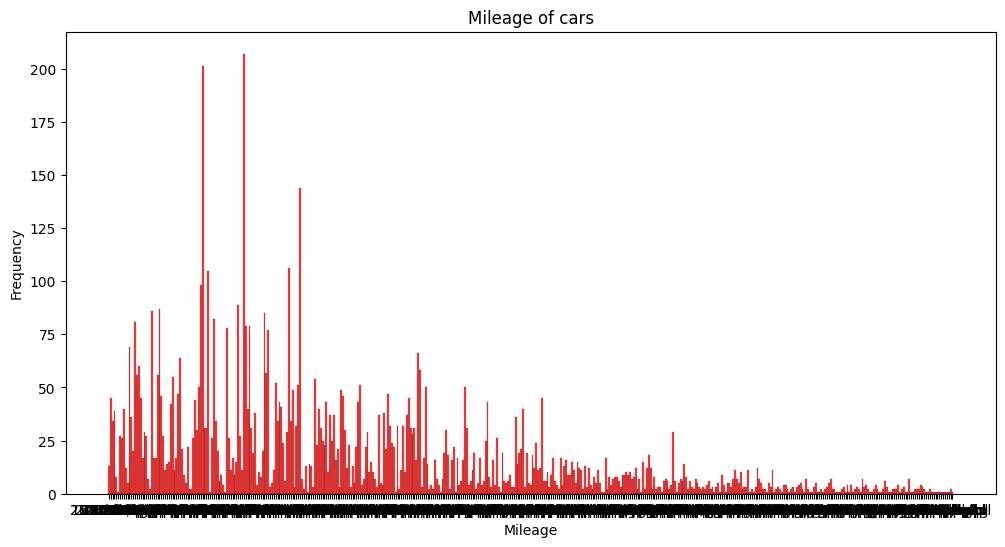

In [124]:
plt.figure(figsize=(12,6)) #:figure 12 inches wide and 6 inches tall
sns.histplot(cars_df['Mileage'],kde=False,color="Red", bins=30)  #kde=kernel density estimate: It adds a smooth curve over the histogram to show the probability distribution of data.
plt.title("Mileage of cars")
plt.xlabel("Mileage")
plt.ylabel("Frequency")
plt.show()  #the following graph is unmanaged because of the mileage column includes both numeric values and string values.

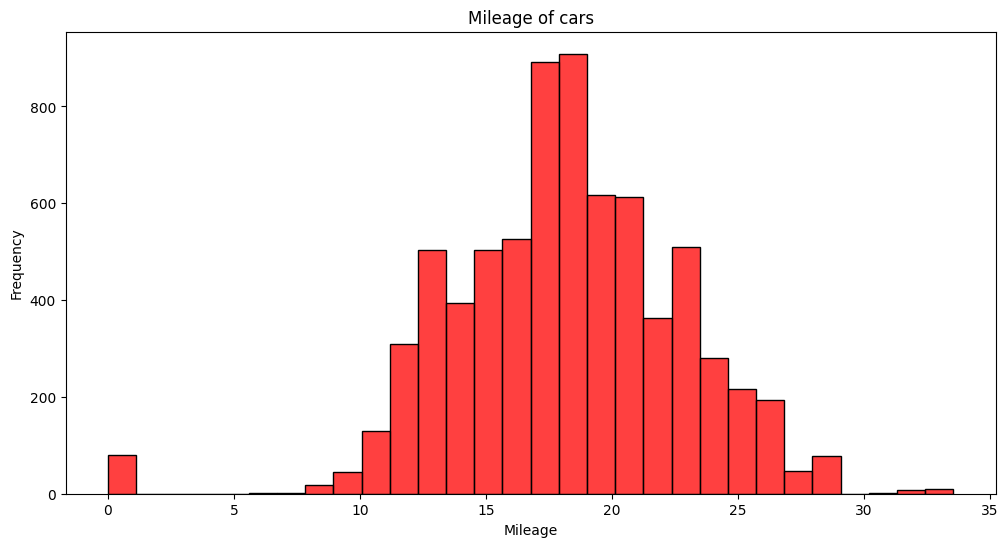

In [ ]:
cars_df['Mileage'] = cars_df['Mileage'].astype(str)  #all colummns values are not string.so converting them all to srting
cars_df['Mileage'] = cars_df['Mileage'].str.extract(r'(\d+\.?\d*)')  # Extract numeric part
cars_df['Mileage'] = cars_df['Mileage'].astype(float)
    #\d+ = one or more digits
    #\.? = optional decimal point
    #\d* = zero or more digits after decimal
plt.figure(figsize=(12,6))
sns.histplot(cars_df['Mileage'],kde=False,color="Red", bins=30)  #kde=kernel density estimate: It adds a smooth curve over the histogram to show the probability distribution of data.
plt.title("Mileage of cars")
plt.xlabel("Mileage")
plt.ylabel("Frequency")
plt.show()


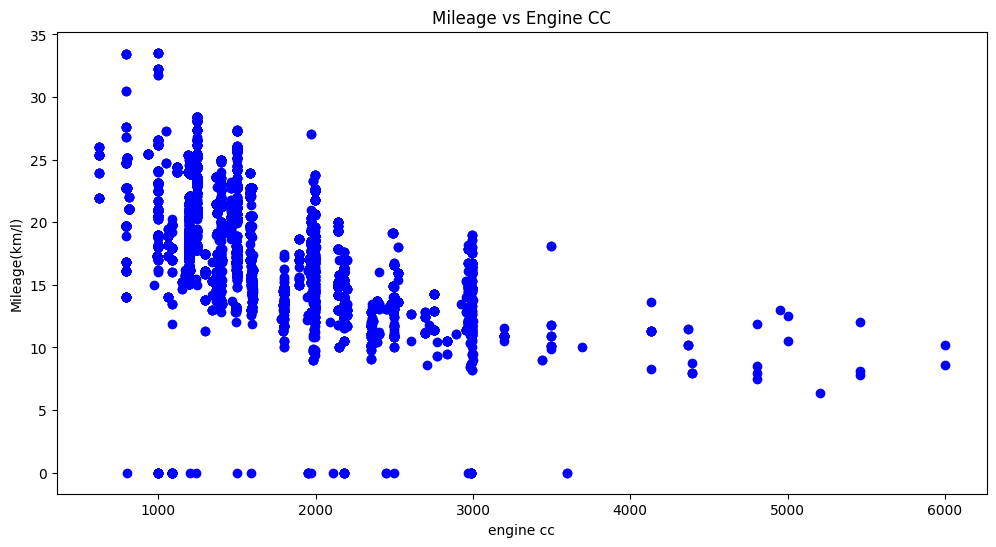

In [ ]:
cars_df['Engine'] = cars_df['Engine'].astype(str)
cars_df['Engine'] = cars_df['Engine'].str.extract(r'(\d+\.?\d*)')  # Extract numeric part
cars_df['Engine'] = cars_df['Engine'].astype(float)
plt.figure(figsize=(12,6))
plt.scatter(cars_df["Engine"],cars_df["Mileage"],color="blue")
plt.title("Mileage vs Engine CC")
plt.xlabel("engine cc")
plt.ylabel("Mileage(km/l)")
plt.show()

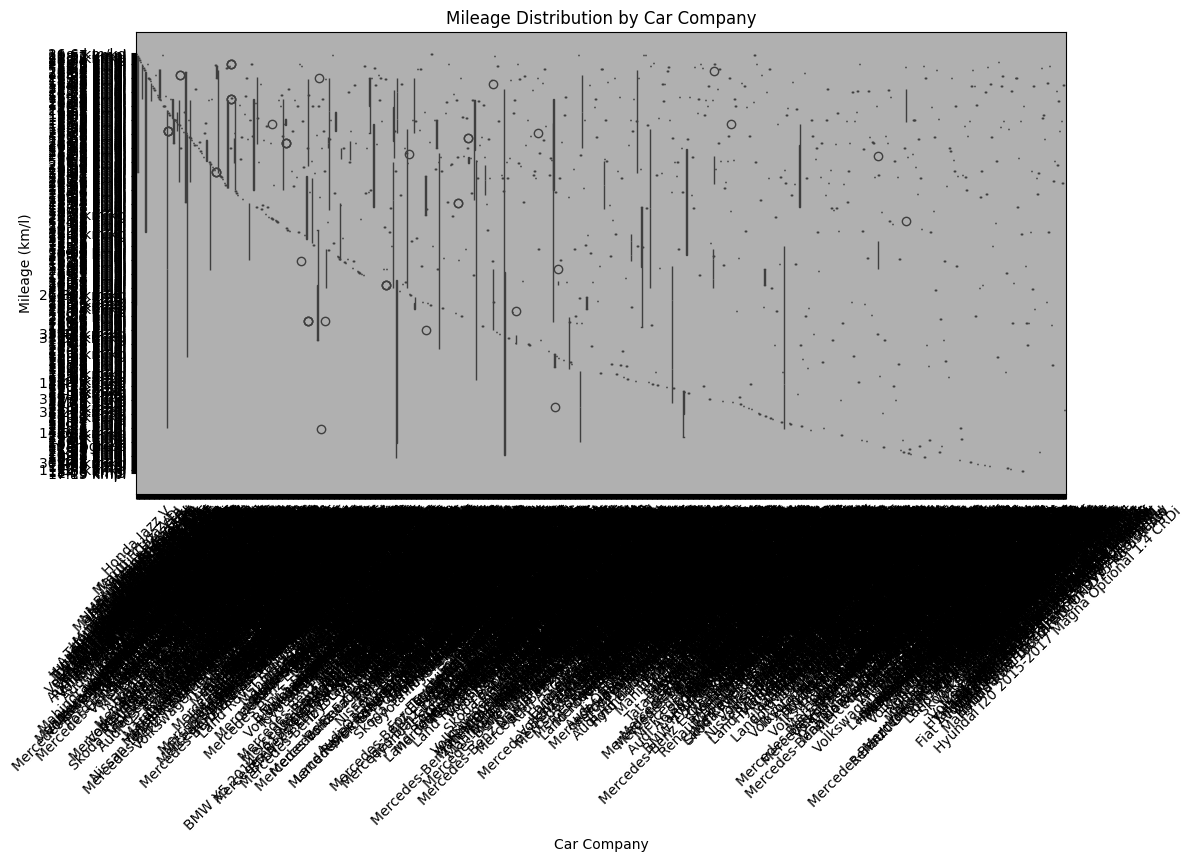

In [126]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=cars_df, x='Name', y='Mileage')
plt.title("Mileage Distribution by Car Company")
plt.xlabel("Car Company")
plt.ylabel("Mileage (km/l)")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

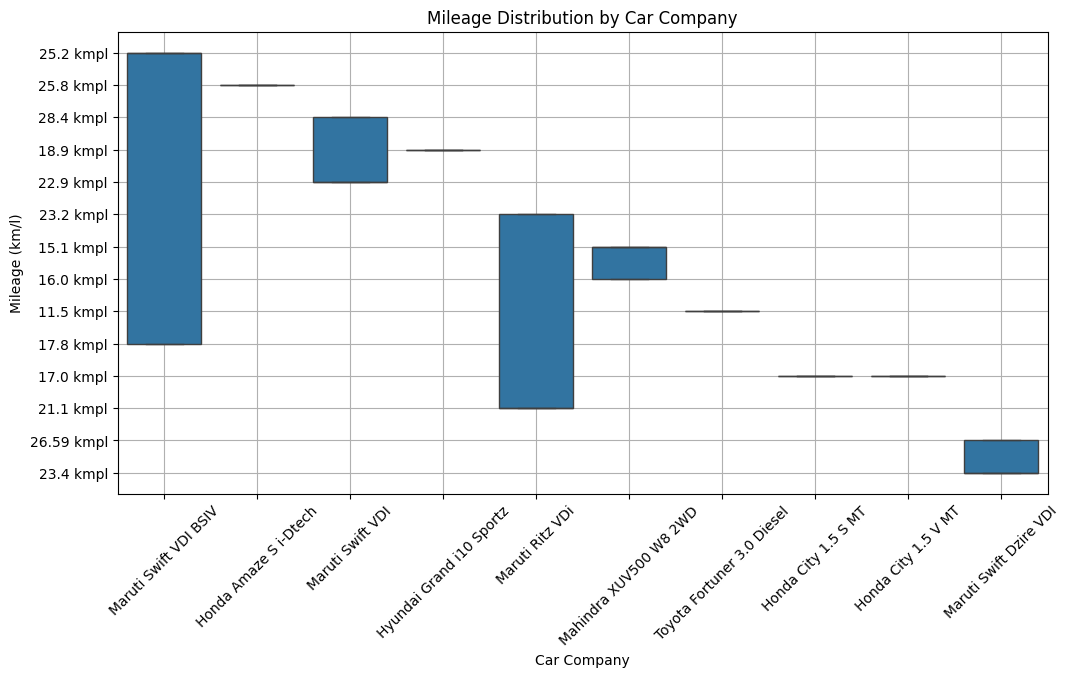

In [127]:
top_companies = cars_df['Name'].value_counts().nlargest(10).index
top_cars_df = cars_df[cars_df['Name'].isin(top_companies)]
plt.figure(figsize=(12, 6))
sns.boxplot(data=top_cars_df, x='Name', y='Mileage')
plt.title("Mileage Distribution by Car Company")
plt.xlabel("Car Company")
plt.ylabel("Mileage (km/l)")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [128]:
cars_df = cars_df[['Name', 'Mileage', 'Price']].dropna()
print(cars_df)

                                                   Name     Mileage      Price
0                                Maruti Wagon R LXI CNG  26.6 km/kg   1.750000
1                      Hyundai Creta 1.6 CRDi SX Option  19.67 kmpl  12.500000
2                                          Honda Jazz V   18.2 kmpl   4.500000
3                                     Maruti Ertiga VDI  20.77 kmpl   6.000000
4                       Audi A4 New 2.0 TDI Multitronic   15.2 kmpl  17.740000
...                                                 ...         ...        ...
7248                  Volkswagen Vento Diesel Trendline  20.54 kmpl   9.479468
7249                             Volkswagen Polo GT TSI  17.21 kmpl   9.479468
7250                             Nissan Micra Diesel XV  23.08 kmpl   9.479468
7251                             Volkswagen Polo GT TSI   17.2 kmpl   9.479468
7252  Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...   10.0 kmpl   9.479468

[7253 rows x 3 columns]


count    7251.000000
mean       18.141580
std         4.562197
min         0.000000
25%        15.170000
50%        18.160000
75%        21.100000
max        33.540000
Name: Mileage, dtype: float64
Decision Trees's Accuracy:  0.05238970588235294


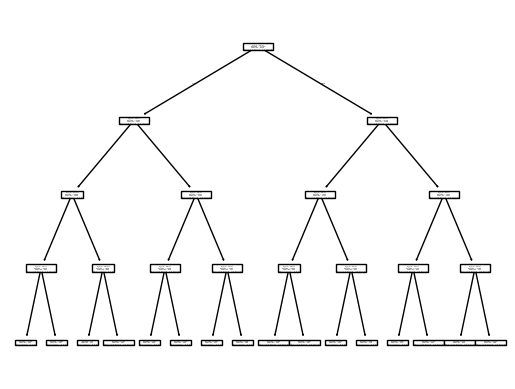

In [129]:
cars_df['Mileage'] = cars_df['Mileage'].astype(str)
cars_df['Price'] = cars_df['Price'].astype(str)
cars_df['Mileage'] = cars_df['Mileage'].str.extract(r'(\d+\.?\d*)')  # Extract numeric part
cars_df['Mileage'] = cars_df['Mileage'].astype(float)
print(cars_df["Mileage"].describe())
cars_df = cars_df[['Name', 'Mileage', 'Price']].dropna()
X = cars_df[["Mileage","Price"]]
y= cars_df["Name"]
label_encode =LabelEncoder()
y=label_encode.fit_transform(cars_df["Name"])
X_trainset, X_testset, y_trainset, ytestset=train_test_split(X,y,test_size=0.3,random_state=42)
car_tree=DecisionTreeClassifier(criterion="entropy",max_depth=4)
car_tree.fit(X_trainset,y_trainset)
car_tree_predictions=car_tree.predict(X_testset)
print("Decision Trees's Accuracy: ", metrics.accuracy_score(ytestset, car_tree_predictions))
plot_tree(car_tree)
plt.show()



In [ ]:
yours_info={'Mileage': 22.45,'Price':4.32 }
input_data_frame=pd.DataFrame([yours_info])
prediction = car_tree.predict(input_data_frame)
predicted_label = label_encode.inverse_transform(prediction)
print("Predicted car name:", predicted_label[0])
    

Predicted car name: Maruti Alto 800 LXI


In [122]:
yours_mileage=float(input("enter what mileage(km/l) of car do you want to buy:(0-33.54)"))   
yours_price=float(input("enter what price(in lakhs) of car do you want to buy:(0.44-160.0)"))
yours_own_info=[[yours_mileage,yours_price]]
input_data_frame1=pd.DataFrame(yours_own_info,columns=["Mileage", "Price"])
prediction1 = car_tree.predict(input_data_frame1)
predicted_label1 = label_encode.inverse_transform(prediction1)
print("Based on your provided information, the best suited car for you is:", predicted_label1[0])
       


Based on your provided information, the best suited car for you is: Honda Amaze S i-Dtech
